In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data set
This part is reading data from the xls file to pandas DataFrame. Temporarily, we will use the mpMRI_FeatureList_CQ.xls

In [85]:
df = pd.read_excel('mpMRI_FeatureList_CQ.xls')

## Explore the dataset

In [4]:
df.head()

,ID,ADC_Max,ADC_Min,ADC_Mean,ADC_Median,ADC_std,ADC_Variance,T2_Max,T2_Min,T2_Mean,...,DM_ADC_difENT,DM_ADC_sumAve,DM_ADC_sumENT,DM_ADC_sumVar,StudyDate,PSA,Gleason,Risk,Location,PIRADS
0,1,1123,745,921.000000,903.0,119.920807,14381.000000,401,260,326.641975,...,2.317684,16.083333,2.866116,76.937500,2014-05-19 00:00:00,6.38,6,Low,PZ,3
1,2,949,690,869.440000,891.0,69.179766,4785.840000,489,260,359.284585,...,2.138191,27.228395,3.011417,73.991046,2014-12-02 00:00:00,4.10,6,Low,TZ,4
2,3,1363,1079,1171.769231,1118.0,97.800097,9564.858974,339,209,263.382166,...,2.058207,11.069444,2.774970,104.731289,2015-02-24 00:00:00,2.50,6,Low,PZ,3
3,4,1339,729,968.326531,952.0,156.219849,24404.641160,317,195,247.812183,...,2.397585,15.545977,3.315552,79.023748,2014-01-08 00:00:00,4.50,6,Low,TZ,3
4,5,1608,1172,1319.384615,1335.0,123.699595,15301.589740,480,345,386.560000,...,2.356139,10.944444,2.722887,60.746914,2014-01-29 00:00:00,3.85,6,Low,PZ,3


Keys on the dataset. The meaning of them are unknown. 

In [8]:
sorted([str(x) for x in df.keys()])

['ADC_Axi_EV_Phase',
 'ADC_Axi_SumF2',
 'ADC_Axi_SumF2_1',
 'ADC_Cor_EV_Phase',
 'ADC_Cor_SumF2',
 'ADC_Cor_SumF2_1',
 'ADC_Max',
 'ADC_Mean',
 'ADC_Median',
 'ADC_Min',
 'ADC_Sag_EV_Phase',
 'ADC_Sag_SumF2',
 'ADC_Sag_SumF2_1',
 'ADC_Variance',
 'ADC_std',
 'CM_ADC_ASM',
 'CM_ADC_CON',
 'CM_ADC_Correlation',
 'CM_ADC_DIS',
 'CM_ADC_ENT',
 'CM_ADC_HOM',
 'CM_ADC_IDM',
 'CM_ADC_IMC1',
 'CM_ADC_IMC2',
 'CM_ADC_MCC',
 'CM_ADC_Mean',
 'CM_ADC_SQV',
 'CM_ADC_StdDev',
 'CM_ADC_Uniformity',
 'CM_ADC_Var',
 'CM_ADC_difAve',
 'CM_ADC_difENT',
 'CM_ADC_sumAve',
 'CM_ADC_sumENT',
 'CM_ADC_sumVar',
 'CM_T2_ASM',
 'CM_T2_CON',
 'CM_T2_Correlation',
 'CM_T2_DIS',
 'CM_T2_ENT',
 'CM_T2_HOM',
 'CM_T2_IDM',
 'CM_T2_IMC1',
 'CM_T2_IMC2',
 'CM_T2_MCC',
 'CM_T2_Mean',
 'CM_T2_SQV',
 'CM_T2_StdDev',
 'CM_T2_Uniformity',
 'CM_T2_Var',
 'CM_T2_difAve',
 'CM_T2_difENT',
 'CM_T2_sumAve',
 'CM_T2_sumENT',
 'CM_T2_sumVar',
 'DM_ADC_ASM',
 'DM_ADC_CON',
 'DM_ADC_Correlation',
 'DM_ADC_DIS',
 'DM_ADC_ENT',
 'DM_AD

In [4]:
print 'columns: ', len(df.keys())
print 'rows: ', len(df)

columns:  117
rows:  68


The first columns is the ID. We just drop them. However, the number of features is even higher than the data.

In [5]:
del df['ID']

In [6]:
df.head()

,ADC_Max,ADC_Min,ADC_Mean,ADC_Median,ADC_std,ADC_Variance,T2_Max,T2_Min,T2_Mean,T2_Median,...,DM_ADC_difENT,DM_ADC_sumAve,DM_ADC_sumENT,DM_ADC_sumVar,StudyDate,PSA,Gleason,Risk,Location,PIRADS
0,1123,745,921.000000,903.0,119.920807,14381.000000,401,260,326.641975,328,...,2.317684,16.083333,2.866116,76.937500,2014-05-19 00:00:00,6.38,6,Low,PZ,3
1,949,690,869.440000,891.0,69.179766,4785.840000,489,260,359.284585,355,...,2.138191,27.228395,3.011417,73.991046,2014-12-02 00:00:00,4.10,6,Low,TZ,4
2,1363,1079,1171.769231,1118.0,97.800097,9564.858974,339,209,263.382166,260,...,2.058207,11.069444,2.774970,104.731289,2015-02-24 00:00:00,2.50,6,Low,PZ,3
3,1339,729,968.326531,952.0,156.219849,24404.641160,317,195,247.812183,245,...,2.397585,15.545977,3.315552,79.023748,2014-01-08 00:00:00,4.50,6,Low,TZ,3
4,1608,1172,1319.384615,1335.0,123.699595,15301.589740,480,345,386.560000,374,...,2.356139,10.944444,2.722887,60.746914,2014-01-29 00:00:00,3.85,6,Low,PZ,3


### The target is Risk.

In [7]:
df.Risk.value_counts()

Intermediate    34
Low             20
High            14
Name: Risk, dtype: int64

There are 3 kinds of classes. Totally, we have 68 rows of records.

### Study Date

In [8]:
df['StudyDate']

0     2014-05-19 00:00:00
1     2014-12-02 00:00:00
2     2015-02-24 00:00:00
3     2014-01-08 00:00:00
4     2014-01-29 00:00:00
5     2013-10-01 00:00:00
6     2013-11-05 00:00:00
7     2013-11-11 00:00:00
8     2013-12-06 00:00:00
9     2014-01-27 00:00:00
10    2014-09-22 00:00:00
11    2015-07-10 00:00:00
12    2015-01-23 00:00:00
13    2014-12-18 00:00:00
14    2015-03-11 00:00:00
15    2015-04-14 00:00:00
16    2015-04-14 00:00:00
17    2015-04-14 00:00:00
18    2015-03-18 00:00:00
19    2015-04-29 00:00:00
20    2014-05-10 00:00:00
21    2014-05-10 00:00:00
22    2014-06-02 00:00:00
23    2014-08-06 00:00:00
24    2013-06-27 00:00:00
25    2015-01-02 00:00:00
26    2015-01-02 00:00:00
27    2013-10-01 00:00:00
28    2013-10-01 00:00:00
29    2014-12-26 00:00:00
             ...         
38    2014-03-05 00:00:00
39    2014-05-05 00:00:00
40    2014-05-12 00:00:00
41    2014-10-17 00:00:00
42    2014-09-17 00:00:00
43    2014-09-08 00:00:00
44    2014-11-14 00:00:00
45    2014-1

In [10]:
import datetime
time_stamp_data = map(lambda x : (x - datetime.datetime(1970, 1, 1)).total_seconds(), df['StudyDate'])

In [11]:
for i in range(len(time_stamp_data)):
    if time_stamp_data[i] > 3 * np.average(time_stamp_data):
        print df['StudyDate'][i], i

2914-12-09 00:00:00 30
2914-12-09 00:00:00 57


It seems a typo. So I fix it.

In [12]:
df.loc[30, 'StudyDate'] = datetime.datetime(2014, 12, 9, 0, 0)
df.loc[57, 'StudyDate'] = datetime.datetime(2014, 12, 9, 0, 0)

In [13]:
time_stamp_data = map(lambda x : (x - datetime.datetime(1970, 1, 1)).total_seconds(), df['StudyDate'])

<IPython.core.display.Javascript object>


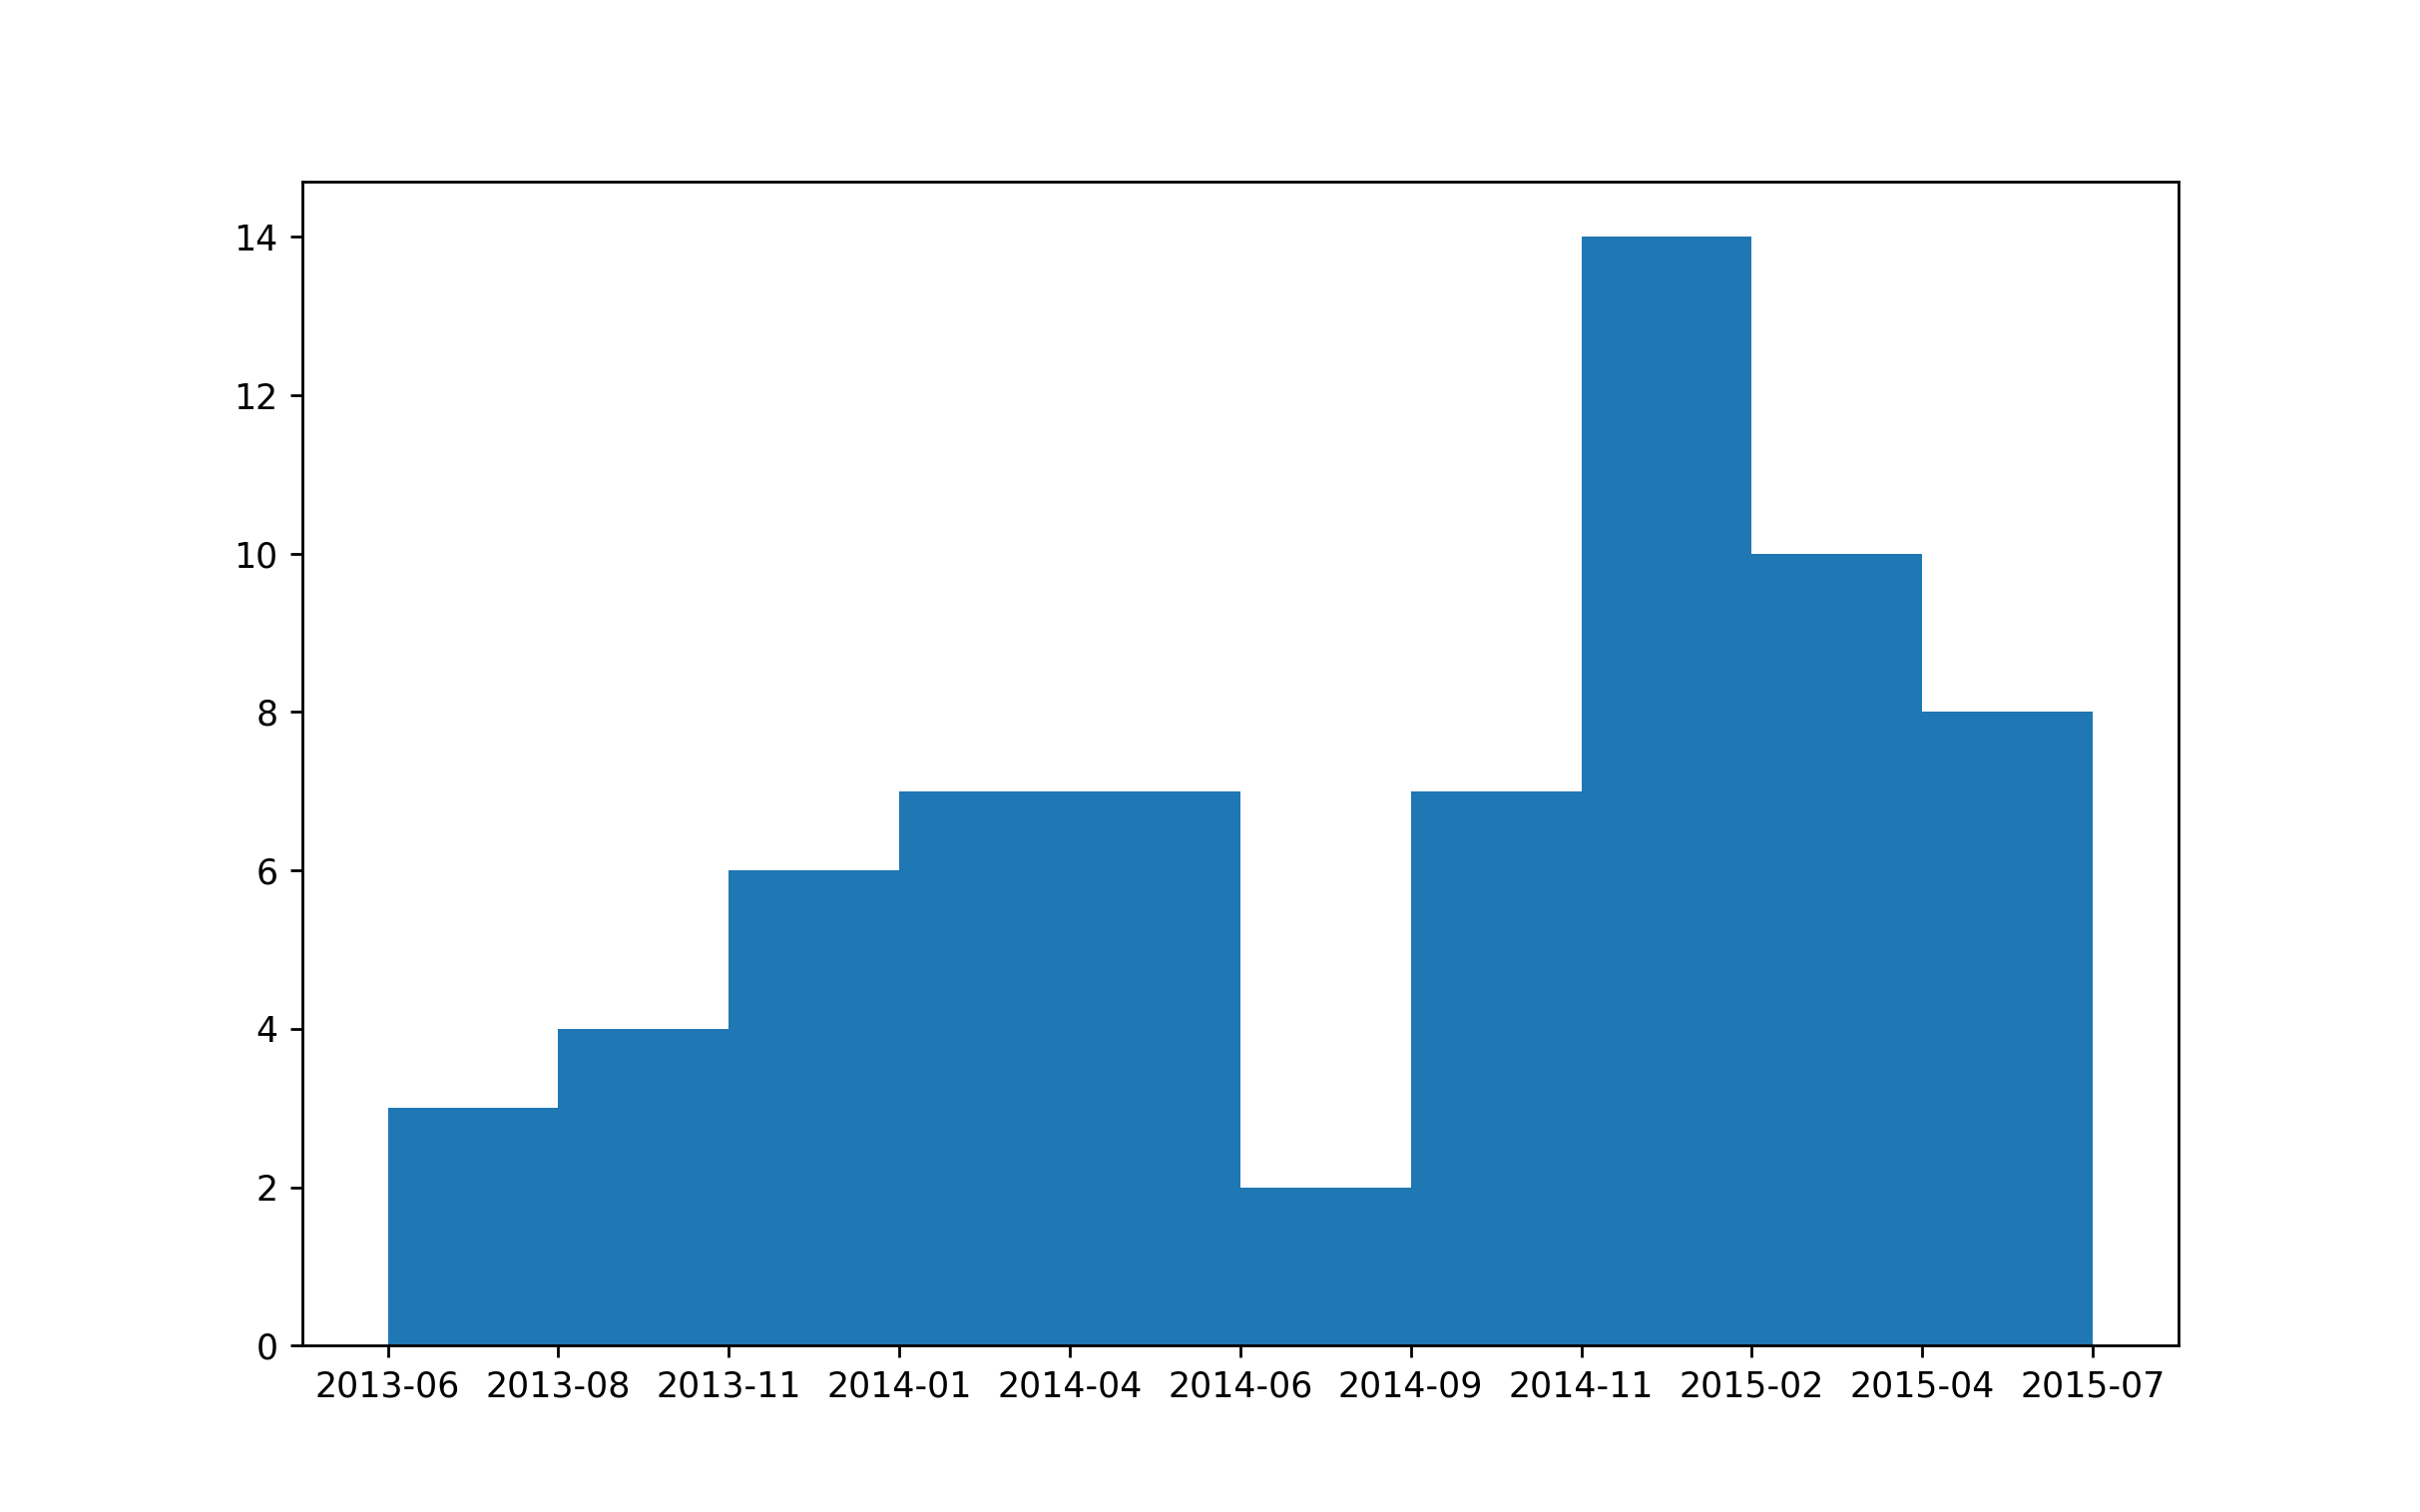

In [14]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(1,1)
n, bins, patches = ax.hist(time_stamp_data)
time_tick = map(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m"), bins)
plt.xticks(bins, time_tick)
plt.show()

### Location


In [15]:
df.Location.value_counts()

PZ    56
TZ    12
Name: Location, dtype: int64

There only two kinds of locations

### Others

In [16]:
df.mean()

ADC_Max               1.274368e+03
ADC_Min               7.514118e+02
ADC_Mean              9.745713e+02
ADC_Median            9.630221e+02
ADC_std               1.255680e+02
ADC_Variance          1.987693e+04
T2_Max                4.547206e+02
T2_Min                2.771471e+02
T2_Mean               3.580963e+02
T2_Median             3.561912e+02
T2_std                3.327448e+01
T2_Variance           1.206673e+03
ADC_Axi_EV_Phase      2.712229e+00
ADC_Axi_SumF2         9.391456e+08
ADC_Axi_SumF2_1       2.165513e+08
ADC_Cor_EV_Phase      3.432479e+00
ADC_Cor_SumF2         4.818119e+08
ADC_Cor_SumF2_1       1.113043e+08
ADC_Sag_EV_Phase      3.330920e+00
ADC_Sag_SumF2         4.982042e+08
ADC_Sag_SumF2_1       1.151681e+08
T2_Axi_EV_Phase       2.709418e+00
T2_Axi_SumF2          5.428897e+08
T2_Axi_SumF2_1        1.219459e+08
T2_Cor_EV_Phase       3.256593e+00
T2_Cor_SumF2          2.063648e+08
T2_Cor_SumF2_1        4.564152e+07
T2_Sag_EV_Phase       3.289053e+00
T2_Sag_SumF2        

Others are just numerial data, but they have different scale.

## Preprocessing


### Drop unused columns

In [10]:
unused_columns = ['StudyDate','PSA','Gleason','Location','PIRADS']
for col in unused_columns:
    del df[col]

### Encoding categorial features

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [66]:
keys = list(set(df['Risk']))
label_enc = LabelEncoder()
label_enc.fit(keys)
for key in keys:
    print key, ' => ', label_enc.transform([key])

High  =>  [0]
Intermediate  =>  [1]
Low  =>  [2]


In [69]:
vals = label_enc.transform(keys).reshape(-1, 1)
vals

array([[0],
       [1],
       [2]])

In [88]:
enc = OneHotEncoder()
enc.fit(vals)
for key in keys:
    print key, ' => ', enc.transform([label_enc.transform([key])]).toarray().astype('int')

High  =>  [[1 0 0]]
Intermediate  =>  [[0 1 0]]
Low  =>  [[0 0 1]]


In [95]:
codes = enc.transform(label_enc.transform(df['Risk']).reshape(-1, 1)).toarray().astype('int')

In [100]:
for key in keys:
    df['Risk_' + key] = codes[:,keys.index(key)]

In [107]:
df[['Risk'] + ['Risk_' + key for key in keys]]

,Risk,Risk_High,Risk_Intermediate,Risk_Low
0,Low,0,0,1
1,Low,0,0,1
2,Low,0,0,1
3,Low,0,0,1
4,Low,0,0,1
5,Low,0,0,1
6,Low,0,0,1
7,Low,0,0,1
8,Low,0,0,1
9,Low,0,0,1


In [108]:
del df['Risk']

### Standardization

In [126]:
df.mean()

ID                    3.450000e+01
ADC_Max               1.274368e+03
ADC_Min               7.514118e+02
ADC_Mean              9.745713e+02
ADC_Median            9.630221e+02
ADC_std               1.255680e+02
ADC_Variance          1.987693e+04
T2_Max                4.547206e+02
T2_Min                2.771471e+02
T2_Mean               3.580963e+02
T2_Median             3.561912e+02
T2_std                3.327448e+01
T2_Variance           1.206673e+03
ADC_Axi_EV_Phase      2.712229e+00
ADC_Axi_SumF2         9.391456e+08
ADC_Axi_SumF2_1       2.165513e+08
ADC_Cor_EV_Phase      3.432479e+00
ADC_Cor_SumF2         4.818119e+08
ADC_Cor_SumF2_1       1.113043e+08
ADC_Sag_EV_Phase      3.330920e+00
ADC_Sag_SumF2         4.982042e+08
ADC_Sag_SumF2_1       1.151681e+08
T2_Axi_EV_Phase       2.709418e+00
T2_Axi_SumF2          5.428897e+08
T2_Axi_SumF2_1        1.219459e+08
T2_Cor_EV_Phase       3.256593e+00
T2_Cor_SumF2          2.063648e+08
T2_Cor_SumF2_1        4.564152e+07
T2_Sag_EV_Phase     

In [118]:
df_std = df.std()
df_std

ID                    1.977372e+01
ADC_Max               2.751676e+02
ADC_Min               2.477668e+02
ADC_Mean              2.125985e+02
ADC_Median            2.134543e+02
ADC_std               6.458288e+01
ADC_Variance          3.262386e+04
T2_Max                1.086316e+02
T2_Min                6.957424e+01
T2_Mean               7.933747e+01
T2_Median             7.974853e+01
T2_std                1.004822e+01
T2_Variance           8.463935e+02
ADC_Axi_EV_Phase      7.578298e-02
ADC_Axi_SumF2         4.409334e+08
ADC_Axi_SumF2_1       9.439008e+07
ADC_Cor_EV_Phase      3.700118e-01
ADC_Cor_SumF2         1.065089e+08
ADC_Cor_SumF2_1       2.393600e+07
ADC_Sag_EV_Phase      2.649107e-01
ADC_Sag_SumF2         1.112945e+08
ADC_Sag_SumF2_1       2.501410e+07
T2_Axi_EV_Phase       2.732512e-02
T2_Axi_SumF2          3.308667e+08
T2_Axi_SumF2_1        6.623240e+07
T2_Cor_EV_Phase       3.225101e-01
T2_Cor_SumF2          5.615752e+07
T2_Cor_SumF2_1        1.049458e+07
T2_Sag_EV_Phase     

In [119]:
print df_mean.shape
print df.shape

(117,)
(68, 119)


In [29]:
sta_data = pd.DataFrame(preprocessing.normalize(df))

In [30]:
normalized_data

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,1.148163e-06,7.616930e-07,9.416365e-07,9.232332e-07,1.226078e-07,0.000015,4.099851e-07,2.658257e-07,3.339609e-07,3.353494e-07,...,8.221854e-08,9.168467e-09,1.652954e-10,3.152243e-08,-1.197226e-08,2.369616e-09,1.644371e-08,2.930336e-09,7.866141e-08,0.000000e+00
1,8.431963e-07,6.130721e-07,7.725064e-07,7.916627e-07,6.146694e-08,0.000004,4.344815e-07,2.310127e-07,3.192281e-07,3.154212e-07,...,1.618871e-07,1.199326e-08,1.385345e-10,2.050916e-08,-5.639725e-09,1.899805e-09,2.419271e-08,2.675675e-09,6.574181e-08,0.000000e+00
2,1.168291e-06,9.248614e-07,1.004378e-06,9.582902e-07,8.382904e-08,0.000008,2.905728e-07,1.791437e-07,2.257572e-07,2.228582e-07,...,4.895856e-08,6.478015e-09,1.696175e-10,3.133245e-08,-1.915336e-08,1.764186e-09,9.488139e-09,2.378557e-09,8.977009e-08,0.000000e+00
3,1.040458e-06,5.664631e-07,7.524297e-07,7.397434e-07,1.213893e-07,0.000019,2.463221e-07,1.515231e-07,1.925603e-07,1.903751e-07,...,5.602066e-08,6.597755e-09,8.451080e-11,2.037515e-08,-7.734585e-09,1.863022e-09,1.207987e-08,2.576321e-09,6.140472e-08,0.000000e+00
4,1.236755e-06,9.014156e-07,1.014773e-06,1.026783e-06,9.514057e-08,0.000012,3.691805e-07,2.653485e-07,2.973133e-07,2.876531e-07,...,3.391632e-08,5.107438e-09,1.450986e-10,1.853321e-08,-9.443157e-09,1.812167e-09,8.417656e-09,2.094243e-09,4.672203e-08,0.000000e+00
5,9.137421e-07,7.658500e-07,8.404888e-07,8.400709e-07,3.582445e-08,0.000002,3.408665e-07,2.287104e-07,2.784496e-07,2.770915e-07,...,4.958582e-08,5.221257e-09,6.514729e-11,1.061036e-08,-4.105327e-09,1.231214e-09,1.035767e-08,1.729138e-09,2.864930e-08,0.000000e+00
6,9.670339e-07,5.305599e-07,7.195692e-07,7.335875e-07,8.997827e-08,0.000011,2.935765e-07,1.627050e-07,2.355826e-07,2.355686e-07,...,4.581924e-08,5.693253e-09,8.117199e-11,1.035455e-08,-3.512462e-09,1.485280e-09,1.143245e-08,2.199147e-09,3.161200e-08,0.000000e+00
7,1.283862e-06,7.599143e-07,9.615302e-07,9.616278e-07,1.332004e-07,0.000014,3.602932e-07,2.943241e-07,3.272828e-07,3.311146e-07,...,5.907097e-08,8.656771e-09,1.934189e-10,2.619937e-08,-1.411336e-08,3.032099e-09,1.545272e-08,3.355169e-09,5.879174e-08,0.000000e+00
8,9.146400e-07,5.006108e-07,7.301842e-07,7.616575e-07,1.224253e-07,0.000023,2.330542e-07,1.204330e-07,1.692547e-07,1.660023e-07,...,7.091014e-08,6.794243e-09,5.869519e-11,2.270825e-08,-6.912209e-09,1.562417e-09,1.250536e-08,2.271665e-09,7.135383e-08,0.000000e+00
9,1.094592e-06,5.217134e-07,6.816784e-07,6.626264e-07,1.138633e-07,0.000015,2.893748e-07,1.719473e-07,2.327814e-07,2.340161e-07,...,2.245872e-08,4.340236e-09,1.082737e-10,1.060926e-08,-5.519448e-09,1.766068e-09,7.982753e-09,2.482641e-09,2.933974e-08,0.000000e+00
